In [78]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 

In [410]:
df = pd.read_csv("C:\\Users\\emman\\Desktop\\ML-Zoomcamp  projects\\car price prediction data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#Data prep:

#Keep only the columns needed

#Lowercase the column names and replace spaces with underscores

#Fill the missing values with 0

#Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average

#Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [411]:
data = df.drop(['Engine Fuel Type','Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Popularity'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Vehicle Style      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [412]:
data.columns = data.columns.str.lower().str.replace(' ','_')
data = data.rename(columns={'msrp':'price'})

In [413]:
data.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

In [414]:
data['engine_cylinders'] = data['engine_cylinders'].fillna(0)
data['engine_hp'] = data['engine_hp'].fillna(0)
data.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [415]:
price_mean = data['price'].mean()
price_mean

40594.737032063116

In [416]:
data['above_avg'] = np.where(data['price'] >= price_mean,1,0)
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_avg
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [417]:
data = data.drop('price', axis=1)

In [418]:
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_avg
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [419]:
data.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
above_avg              int32
dtype: object

In [420]:
num_var = ['year','engine_hp','engine_cylinders','highway_mpg','city_mpg']
cat_var = ['make','model','transmission_type','vehicle_style']

In [581]:
from sklearn.model_selection import train_test_split

In [582]:
data_full_train, data_test = train_test_split(data, test_size=0.2, random_state=1)

In [583]:
data_train, data_val = train_test_split(data_full_train, test_size=0.25, random_state=1)

In [584]:
assert len(data) == len(data_train) + len(data_val) + len(data_test)

In [585]:
len(data_train), len(data_val), len(data_test)

(7148, 2383, 2383)

In [586]:
y_train = data_train['above_avg'].values
y_val = data_val['above_avg'].values
y_test = data_test['above_avg'].values

In [543]:
data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [544]:
data_train = data_train.drop('above_avg', axis=1)              
data_val = data_val.drop('above_avg', axis=1)
data_test = data_test.drop('above_avg', axis=1)

assert 'above_avg' not in data_train.columns
assert 'above_avg' not in data_val.columns
assert 'above_avg' not in data_test.columns

In [545]:
y_train.shape, y_val.shape, y_test.shape

((7148,), (2383,), (2383,))

In [546]:
num_var

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [547]:
data_train[num_var].shape

(7148, 5)

In [548]:
from sklearn.preprocessing import StandardScaler

In [549]:
sc = StandardScaler()

In [550]:
num_var_trans = sc.fit_transform(data_train[num_var])

In [551]:
num_var_trans

array([[ 0.74687366,  0.28819104,  0.20885012,  0.15277794,  0.80060489],
       [ 0.48514933,  0.46801719,  0.20885012,  0.36874881, -0.18643089],
       [ 0.74687366,  0.09937357, -0.89452064,  0.0447925 , -0.07676024],
       ...,
       [ 0.87773583, -1.06050513, -0.89452064,  1.12464685,  1.3489581 ],
       [-2.5246805 , -0.77278328, -0.34283526, -0.71110554, -0.40577217],
       [-0.9543345 , -0.07146127,  0.20885012, -0.92707641, -0.62511345]])

In [552]:
num_var_trans.shape

(7148, 5)

In [553]:
X = num_var_trans[:,1].reshape(-1,1)
X

array([[ 0.28819104],
       [ 0.46801719],
       [ 0.09937357],
       ...,
       [-1.06050513],
       [-0.77278328],
       [-0.07146127]])

In [554]:
y_year = y_train
y_year.shape

(7148,)

In [555]:
X_train_year, X_test_year, y_train_year, y_test_year = train_test_split(X, y_year, test_size=0.2, random_state=1)

In [556]:
from sklearn.linear_model import LogisticRegression

In [557]:
LR = LogisticRegression().fit(X_train_year, y_train_year)
LR

LogisticRegression()

In [558]:
y_pred = LR.predict(X_test_year)

In [559]:
y_test_year.shape, y_pred.shape

((1430,), (1430,))

In [560]:
from sklearn.metrics import roc_auc_score

In [561]:
auc = roc_auc_score(y_test_year, y_pred)
auc

0.8218595683467685

In [562]:
n = 0

for num in num_var:
    
    data_train[num].shape
    sc = StandardScaler()
    
    num_var_trans = sc.fit_transform(data_train[num_var])
    
    n =  n + 1
    X = num_var_trans[:,n].reshape(-1,1)
    y = y_train
    X_train, X_test, y_train, y_test = train_test_split(X, y_year, test_size=0.2, random_state=1)
    
    LR = LogisticRegression().fit(X_train, y_train)
    y_pred = LR.predict(X_test)
    
    auc = roc_auc_score(y_test, y_pred)
    
    print(num, auc)

year 0.8218595683467685
engine_hp 0.687082788348325
engine_cylinders 0.5
highway_mpg 0.5013192612137203


IndexError: index 5 is out of bounds for axis 1 with size 5

#Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

#LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)


In [564]:
cat_var

['make', 'model', 'transmission_type', 'vehicle_style']

In [565]:
num_var

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [568]:
dict_train = data_train.to_dict(orient='records')

In [569]:
from sklearn.feature_extraction import DictVectorizer

In [572]:
dv = DictVectorizer(sparse=False)

In [574]:
X_train = dv.fit_transform(dict_train)

In [577]:
dict_val = data_val.to_dict(orient='records')

In [578]:
X_val = dv.transform(dict_val)

In [579]:
LR = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [587]:
LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [598]:
y_pred = LR.predict_proba(X_val)[:,1]
y_pred >= 0.5
y_pred

array([0.67420108, 0.00721517, 0.34472323, ..., 0.00430849, 0.99999448,
       0.05153637])

In [599]:
auc = roc_auc_score(y_val, y_pred)
auc.round(3)

0.979

#Now let's compute precision and recall for our model.

#Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01

#For each threshold, compute precision and recall

#Plot them

#At which threshold precision and recall curves intersect?

In [607]:
threshhold = np.arange(0,1,0.01)

In [608]:
threshhold

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [617]:
scores = []
threshold = np.arange(0,1,0.01)

for t in threshold:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    TP = (predict_positive & actual_positive).sum()        
    TN = (predict_negative & actual_negative).sum()
    
    FP = (predict_positive & actual_negative).sum()        
    FN = (predict_negative & actual_positive).sum()
    
    #Precision = TP / (TP + FP)
    #Recall = TP / (TP + FN)
    
    scores.append((t, TP, FP, FN, TN))
    columns = ['threshold','TP','FP','FN','TN']
    df_scores = pd.DataFrame(scores, columns=columns)

In [618]:
df_scores['Precision'] = df_scores['TP'] / (df_scores['TP'] + df_scores['FP'])
df_scores['Recall'] = df_scores['TP'] / (df_scores['TP'] + df_scores['FN'])

In [619]:
df_scores[::10]

,threshold,TP,FP,FN,TN,Precision,Recall
0,0.0,654,1729,0,0,0.274444,1.000000
10,0.1,644,332,10,1397,0.659836,0.984709
20,0.2,623,201,31,1528,0.756068,0.952599
30,0.3,606,143,48,1586,0.809079,0.926606
40,0.4,590,106,64,1623,0.847701,0.902141
50,0.5,569,75,85,1654,0.883540,0.870031
60,0.6,550,51,104,1678,0.915141,0.840979
70,0.7,506,30,148,1699,0.944030,0.773700
80,0.8,464,21,190,1708,0.956701,0.709480
90,0.9,376,3,278,1726,0.992084,0.574924


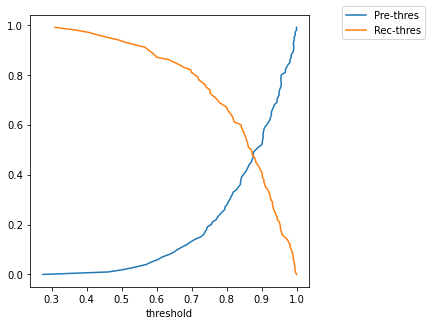

In [627]:
plt.figure(figsize=(5,5))

plt.plot(df_scores['Precision'], df_scores['threshold'], label = 'Pre-thres')
plt.plot(df_scores['Recall'], df_scores['threshold'], label = 'Rec-thres')

plt.xlabel('threshold')
plt.legend(bbox_to_anchor=(1.1, 1.05))

#Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

#Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

#F1 = 2 . ((Precision * Recall) / (Precision + Recall))

#At which threshold F1 is maximal?

In [631]:
df_scores['F1'] = 2 * ((df_scores['Precision'] * df_scores['Recall']) / (df_scores['Precision'] + df_scores['Recall']))
df_scores[::20]

,threshold,TP,FP,FN,TN,Precision,Recall,F1
0,0.0,654,1729,0,0,0.274444,1.000000,0.430688
20,0.2,623,201,31,1528,0.756068,0.952599,0.843031
40,0.4,590,106,64,1623,0.847701,0.902141,0.874074
60,0.6,550,51,104,1678,0.915141,0.840979,0.876494
80,0.8,464,21,190,1708,0.956701,0.709480,0.814750


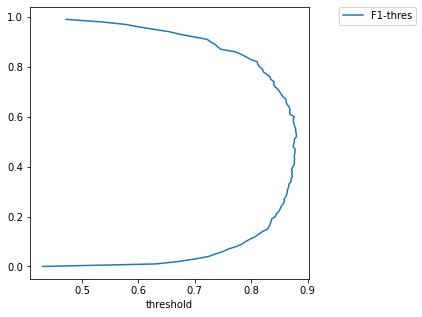

In [642]:
plt.figure(figsize=(5,5))

plt.plot(df_scores['F1'], df_scores['threshold'], label = 'F1-thres')
#plt.plot([0,1],[0,1], label = 'line')

plt.xlabel('threshold')
plt.legend(bbox_to_anchor=(1.4, 1.02))

<AxesSubplot:xlabel='threshold', ylabel='F1'>

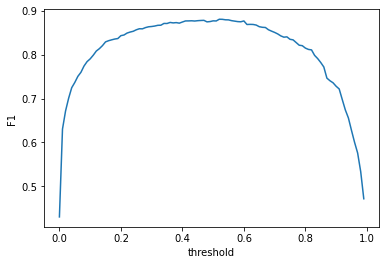

In [634]:
sns.lineplot(data=df_scores, x='threshold', y='F1')

#Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

#KFold(n_splits=5, shuffle=True, random_state=1)

#Iterate over different folds of df_full_train

#Split the data into train and validation

#Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

#Use AUC to evaluate the model on validation

#How large is standard devidation of the scores across different folds?

In [643]:
from sklearn.model_selection import KFold

In [644]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [646]:
train_data, val_data = next(kfold.split(data_full_train))

In [648]:
df_train = data_full_train.iloc[train_data]
df_val = data_full_train.iloc[val_data]

In [652]:
y_df_train = df_train['above_avg']
y_df_val = df_val['above_avg']

In [653]:
del df_train['above_avg']
del df_val['above_avg']

In [660]:
dict_df_train = df_train.to_dict(orient='records')
dict_df_val = df_val.to_dict(orient='records')

In [661]:
dv = DictVectorizer(sparse=False)

In [662]:
X_df_train = dv.fit_transform(dict_df_train)

In [666]:
X_df_val = dv.transform(dict_df_val)

In [667]:
LR = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [668]:
LR.fit(X_df_train, y_df_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [674]:
y_val_pred = LR.predict_proba(X_df_val)

In [675]:
from tqdm.auto import tqdm

In [692]:
n = 5

scores = []

kfold = KFold(n_splits=n, shuffle=True, random_state=1)

for train_data, val_data in tqdm(kfold.split(data_full_train)):
    df_train = data_full_train.iloc[train_data]
    df_val = data_full_train.iloc[val_data]
    
    y_df_train = df_train['above_avg']
    y_df_val = df_val['above_avg']
    
    dict_df_train = df_train.to_dict(orient='records')
    dict_df_val = df_val.to_dict(orient='records')
    
    X_df_train = dv.fit_transform(dict_df_train)
    X_df_val = dv.transform(dict_df_val)
    
    LR.fit(X_df_train, y_df_train)
    y_val_pred = LR.predict(X_df_val)
    
    auc = roc_auc_score(y_df_val, y_val_pred)
    scores.append(auc)
    
    print('%.5f +- %.5f' % (np.mean(scores), np.sum(np.std(scores))))

0it [00:00, ?it/s]

1.00000 +- 0.00000
0.99953 +- 0.00047
0.99904 +- 0.00079
0.99904 +- 0.00069
0.99923 +- 0.00072


In [686]:
#combining all functions above and the kfold.split() method into a loop

n_splits = 5

for C in tqdm([0.01, 0.1, 0.5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    scores = []

    for train_idx, val_idx in kfold.split(data_full_train):
        df_train = data_full_train.iloc[train_idx]
        df_val = data_full_train.iloc[val_idx]
        
        y_df_train = df_train['above_avg']
        y_df_val = df_val['above_avg']
    
        dict_df_train = df_train.to_dict(orient='records')
        dict_df_val = df_val.to_dict(orient='records')
    
        X_df_train = dv.fit_transform(dict_df_train)
        X_df_val = dv.transform(dict_df_val)
    
        LR = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        LR.fit(X_df_train, y_df_train)
        y_val_pred = LR.predict(X_df_val)
    
        auc = roc_auc_score(y_df_val, y_val_pred)
        scores.append(auc)
    
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores))) 

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.986 +- 0.002
C=0.1 0.999 +- 0.001
C=0.5 0.999 +- 0.001
C=10 0.999 +- 0.001
